In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle(r'C:\Users\danys\Downloads\data_compressed.pkl')

In [3]:
df.shape

(5531451, 190)

In [4]:
df_columns = df.columns.to_list()
df_columns[-1]

'D_145'

In [5]:
df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [6]:
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
num_features = [col for col in df if col not in cat_features + ['S_2', 'customer_ID', 'B_31', 'D_87']]
binary_features = ['B_31', 'D_87']

In [7]:
sampled_df = df.iloc[:15000, :]

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
enc = OneHotEncoder(handle_unknown='ignore')

In [10]:
feature_array = enc.fit_transform(sampled_df[['D_63', 'D_64']]).toarray()

In [11]:
feature_labels = enc.categories_

In [12]:
feature_labels = np.concatenate((np.array(feature_labels)[0], np.array(feature_labels)[1]), axis=0)

C:\Users\danys\AppData\Local\Temp/ipykernel_12184/1327049505.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  feature_labels = np.concatenate((np.array(feature_labels)[0], np.array(feature_labels)[1]), axis=0)


In [13]:
cat_enc_features = pd.DataFrame(feature_array, columns=feature_labels)

In [14]:
cat_enc_features.head()

,CL,CO,CR,XL,XM,XZ,-1,O,R,U,NaN
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
new_sampled_df = pd.concat([cat_enc_features, sampled_df], axis=1)

In [16]:
new_sampled_df.head()

,CL,CO,CR,XL,XM,XZ,-1,O,R,U,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [17]:
from sklearn.impute import SimpleImputer

In [18]:
feature_labels = feature_labels.tolist()

In [19]:
feature_labels

['CL', 'CO', 'CR', 'XL', 'XM', 'XZ', '-1', 'O', 'R', 'U', nan]

In [38]:
aggregated_num = new_sampled_df.groupby('customer_ID')[num_features + feature_labels].agg(['mean', 'median', 'max', 'min', 'std'])

In [39]:
aggregated_cat = new_sampled_df.groupby('customer_ID')[cat_features].agg(['count', 'nunique'])

In [40]:
df_features = pd.concat([aggregated_cat, aggregated_num], axis=1)
df_features.reset_index(inplace=True)
df_features_sharp = df_features.drop('customer_ID', axis=1)
print(df_features_sharp.shape)

(1251, 952)


C:\Users\danys\AppData\Local\Temp/ipykernel_12184/4085544773.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_features_sharp = df_features.drop('customer_ID', axis=1)


In [41]:
df_features_sharp.head()

B_30          B_38         D_114         D_116         D_117          ...  \
  count nunique count nunique count nunique count nunique count nunique  ...   
0    13       1    13       1    13       1    13       1    13       1  ...   
1    13       1    13       1    13       1    13       1    13       1  ...   
2    13       1    13       1    13       2    13       1    13       1  ...   
3    13       1    13       1    13       1    13       1    13       2  ...   
4    13       1    13       2    13       1    13       1    13       1  ...   

     U                        NaN                        
  mean median  max  min  std mean median  max  min  std  
0  0.0    0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  
1  0.0    0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  
2  0.0    0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  
3  0.0    0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  
4  0.0    0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.0  

[5 rows x 952 columns]

In [42]:
train_labels = pd.read_csv(r"C:\Users\danys\Downloads\train_new\train_labels.csv")

In [43]:
train_labels_sharp = train_labels.iloc[:1251]

In [44]:
X = df_features_sharp
y = train_labels_sharp.target

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, classification_report
from sklearn.linear_model import SGDClassifier

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=42)
X_train, X_test = X_train.reset_index(), X_test.reset_index()  # that's done for the sake of starting from 0
X_train, X_test = X_train.drop('index', axis=1), X_test.drop('index', axis=1)

C:\Users\danys\AppData\Local\Temp/ipykernel_12184/2102111229.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_train, X_test = X_train.drop('index', axis=1), X_test.drop('index', axis=1)


In [48]:
model = RandomForestClassifier(class_weight={0: 0.8, 1: 1}, oob_score=True)

In [49]:
X = df_features_sharp
y = train_labels_sharp.target

In [56]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)

In [57]:
X_train_imp = imp.transform(X_train)
X_test_imp = imp.transform(X_test)

In [58]:
model.fit(X_train_imp, y_train)
y_pred = model.predict(X_test_imp)

In [59]:
y_pred_proba = model.predict_proba(X_test_imp)[:, model.classes_[model.classes_ == 1][0]]

In [60]:
scores_rf = pd.DataFrame(
        {"scores" : [model.oob_score_, model.score(X_test_imp, y_test), roc_auc_score(y_test, y_pred_proba), f1_score(y_test, y_pred)]},
        index = ["oob_score", "accuracy", "roc_auc", "f1_score"]
)

In [61]:
scores_rf

,scores
oob_score,0.877714
accuracy,0.877660
roc_auc,0.936092
f1_score,0.741573


In [62]:
target_names = ['class 0', 'class 1']

In [63]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.91      0.93      0.92       283
     class 1       0.78      0.71      0.74        93

    accuracy                           0.88       376
   macro avg       0.84      0.82      0.83       376
weighted avg       0.87      0.88      0.88       376



In [72]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [79]:
grid_params = {
    'loss': ['squared_hinge', 'modified_huber'],
    'class_weight': [{0: 0.2, 1:1}, {0: 0.2, 1: 0.8}]
}
gs = GridSearchCV(SGDClassifier(),
                 grid_params,
                 verbose=1,
                 cv=5,
                 n_jobs=-1)

In [82]:
gs_results = gs.fit(X_train_imp, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [83]:
print('The best parameters for SGDClassifier are:', gs_results.best_params_)

The best parameters for SGDClassifier are: {'class_weight': {0: 0.2, 1: 1}, 'loss': 'modified_huber'}


In [84]:
predictions = gs.predict(X_test_imp)

In [85]:
predictions_proba = gs.predict_proba(X_test_imp)[:, gs.classes_[gs.classes_ == 1][0]]

In [86]:
score_svm = pd.DataFrame(
        {roc_auc_score(y_test, predictions_proba)},
        index = ["roc_auc"], columns=['result']
)

In [87]:
score_svm

,result
roc_auc,0.861507


In [89]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold, cross_val_score

In [90]:
model_log_regression = LogisticRegressionCV(random_state=42,
                       penalty = 'l2', class_weight= {0: 0.2, 1:1}, cv=5)

In [91]:
model_log_regression.fit(X_train_imp, y_train)

C:\Users\danys\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danys\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\danys\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\danys\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV(class_weight={0: 0.2, 1: 1}, cv=5, random_state=42)

In [92]:
preds_log = model_log_regression.predict(X_test_imp)

In [94]:
predictions_proba_log = model_log_regression.predict_proba(X_test_imp)[:, model_log_regression.classes_[model_log_regression.classes_ == 1][0]]

In [95]:
score_log = pd.DataFrame(
        {roc_auc_score(y_test, predictions_proba_log)},
        index = ["roc_auc"], columns=['result']
)

In [96]:
score_log

,result
roc_auc,0.91755


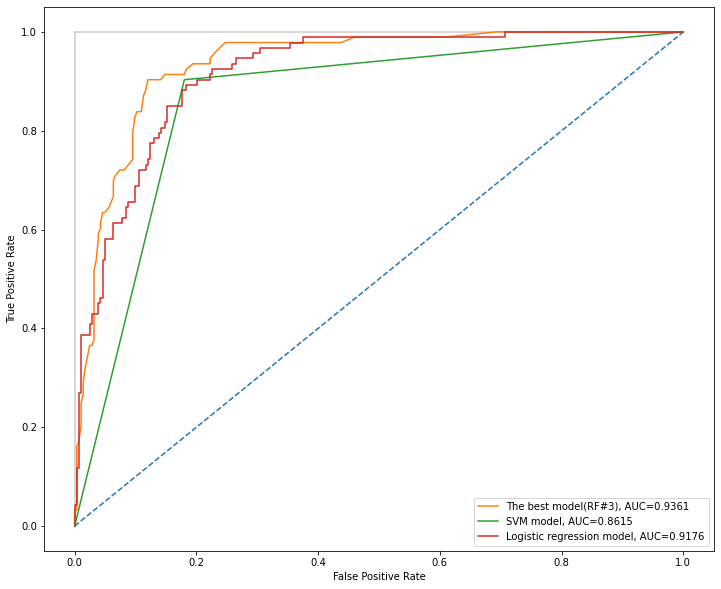

In [97]:
plt.figure(figsize=(12,10))
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr, label="The best model(RF#3), AUC={:.4f}".format(roc_auc_score(y_test, y_pred_proba)))
fpr1, tpr1, _ = metrics.roc_curve(y_test,  predictions_proba)
plt.plot(fpr1,tpr1, label="SVM model, AUC={:.4f}".format(roc_auc_score(y_test, predictions_proba)))
fpr2, tpr2, _ = metrics.roc_curve(y_test,  predictions_proba_log)
plt.plot(fpr2,tpr2, label="Logistic regression model, AUC={:.4f}".format(roc_auc_score(y_test, predictions_proba_log)))
plt.plot()

plt.legend(loc=4)